##**Obtenção das bases de imagens:**
*Baixar as imagens de teste diretamente do github*

*Obs.: Desta forma as imagens ficarão disponíveis somente enquanto esta sessão permanecer ativa ou até que o usuário  clique em no menu: Runtime>Factory reset runtime*

In [ ]:
!git clone https://github.com/guimota-uerj/TestImages.git
!pwd
!ls

Cloning into 'TestImages'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 104 (delta 22), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 19.32 MiB | 13.99 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content
sample_data  TestImages


# **Questão 1:**

Utilizando a imagem colorida PorDoSol.tiff, implemente uma correção gama.
Utilize valores de gama acima de um e abaixo de um. Execute a correção gama nos canais R, G e B independentemente e apresente a imagem resultante. Em seguida, analise os resultados quanto aos seus efeitos qualitativos nas partes claras e escuras da imagem. Apresente também os gráficos das funções gama e os histogramas das imagens.

*Entrar na pasta da imagem de teste utilizada*

In [ ]:
%cd /content/TestImages/PorDoSol/
!ls

/content/TestImages/PorDoSol
PorDoSol.tiff  RecortePorDoSol.tiff


**Código de correção e geração de imagens com com valores de gama 1, 0.5 e 2. Com as imagens prontas, foram gerados gráficos de suas respectivas correções de gama, histogramas que pudessem representar quantitativamente as diferenças causadas pela correção do gama tanto para a imagem como um todo quanto para as bandas r, g e b dessas imagens.**

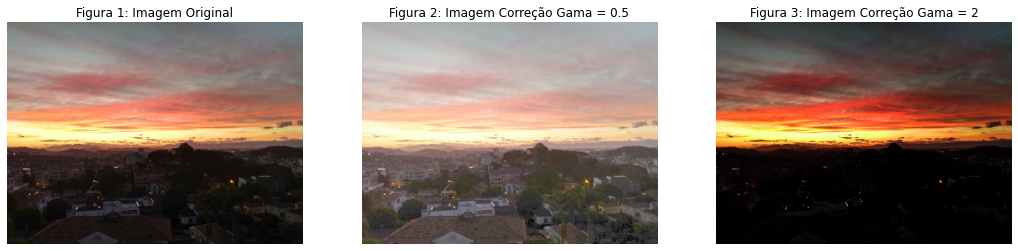

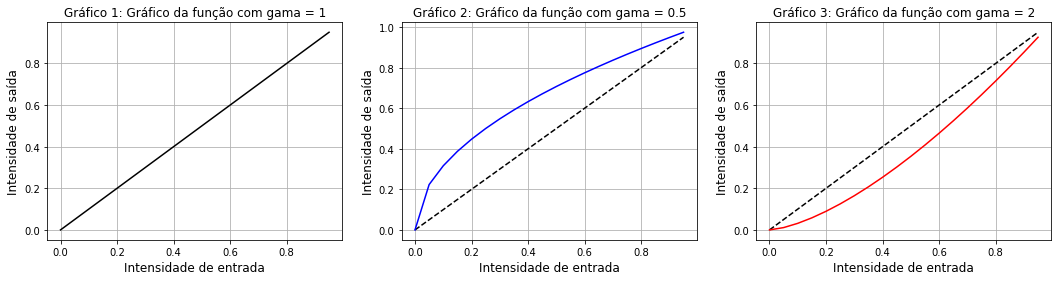

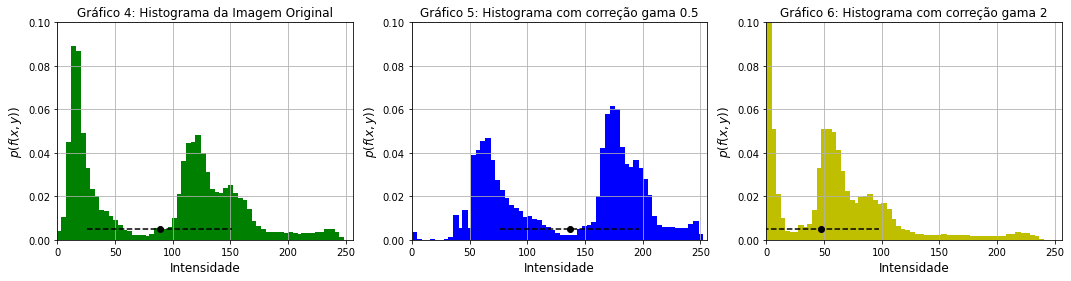

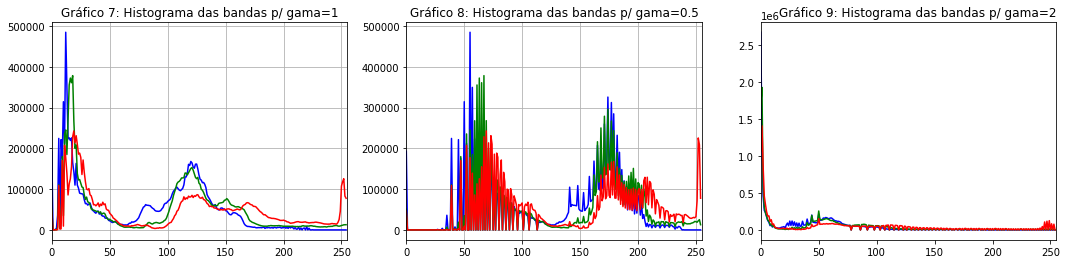

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
original = cv2.imread('PorDoSol.tiff')
plt.figure(figsize = (18,18))
plt.subplot(1,3,1)
plt.title('Figura 1: Imagem Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))

#TRABALHANDO COM GAMA <1
gama = 1/2 # foi alterado o gama de forma a ele ser corrigido em TODAS as bandas da imagem de uma só vez
gama_corrected = np.uint8(((np.float32(original)/255)**gama)*255)
cv2.imwrite("gama_menor.tiff", gama_corrected) #salvando  imagem para gerar histograma
plt.subplot(1,3,2)
plt.title('Figura 2: Imagem Correção Gama = 0.5')
plt.axis('off')
plt.imshow(cv2.cvtColor(gama_corrected, cv2.COLOR_BGR2RGB))


#TRABALHANDO COM GAMA >1
gama = 2
gama_corrected2 = np.uint8(((np.float32(original)/255)**gama)*255)
cv2.imwrite("gama_maior.tiff", gama_corrected2)
plt.subplot(1,3,3)
plt.title('Figura 3: Imagem Correção Gama = 2')
plt.axis('off')
plt.imshow(cv2.cvtColor(gama_corrected2, cv2.COLOR_BGR2RGB))

#gráfios de gama
#(fonte: https://matplotlib.org/tutorials/introductory/pyplot.html)
plt.figure(figsize = (18,4))

#gráfico da imagem com gama=1
plt.subplot(1,3,1) # os gráficos estão na posição das respctivas imagens
t = np.arange(0., 1., .05)
plt.grid(True)
plt . ylabel ( 'Intensidade de saída', fontsize =12)
plt . xlabel ( 'Intensidade de entrada', fontsize =12)
plt.title('Gráfico 1: Gráfico da função com gama = 1')
plt.plot(t, t, 'k-')

#gráfico da imagem com gama=0.5
plt.subplot(1,3,2)
t = np.arange(0., 1., .05)
plt.grid(True)
plt . ylabel ( 'Intensidade de saída', fontsize =12)
plt . xlabel ( 'Intensidade de entrada', fontsize =12)
plt.title('Gráfico 2: Gráfico da função com gama = 0.5')
plt.plot(t, t, 'k--', t, t**(1/2), 'b-'  )

#grico da imagem com gama=2

plt.subplot(1,3,3)
t = np.arange(0., 1., .05)
plt.grid(True)
plt . ylabel ( 'Intensidade de saída', fontsize =12)
plt . xlabel ( 'Intensidade de entrada', fontsize =12)
plt.title('Gráfico 3: Gráfico da função com gama = 2')
plt.plot(t, t, 'k--', t, t**(3/2), 'r-'  )

#histogramas
plt.figure(figsize = (18,4))

#histogramas' da imagem original
img = cv2 . imread ('PorDoSol.tiff',0)
rows , cols = img . shape
hist , bins = np . histogram ( img , range =(0 ,256) , bins =64)
hist = hist / float ( rows * cols )
center = ( bins [: -1] + bins [1:])/ 2
plt.subplot(1,3,1)
plt . bar ( center , hist , align =  'center', color = 'g' , width =5)
plt . xlim ([0 ,256])
plt . ylim ([0 ,0.1])
plt.grid(True)
plt . ylabel ( '$p ( f(x , y )) $', fontsize =12)
plt . xlabel ( 'Intensidade', fontsize =12)
m_y = 0.005
m = np . mean ( img )
s = np . std ( img )
plt . plot (m , m_y , 'ko' )
plt . plot ([ m - s , m + s ], [ m_y ] * 2, 'k--' )
plt.title('Gráfico 4: Histograma da Imagem Original')

#histogramas da imagem com correção de gama 0.5
img = cv2 . imread ('gama_menor.tiff',0)
rows , cols = img . shape
hist , bins = np . histogram ( img , range =(0 ,256) , bins =64)
hist = hist / float ( rows * cols )
center = ( bins [: -1] + bins [1:])/ 2
plt.subplot(1,3,2)
plt . bar ( center , hist , align =  'center', color = 'b' , width =5)
plt . xlim ([0 ,256])
plt . ylim ([0 ,0.1])
plt.grid(True)
plt . ylabel ( '$p ( f(x , y )) $', fontsize =12)
plt . xlabel ( 'Intensidade', fontsize =12)
m_y = 0.005
m = np . mean ( img )
s = np . std ( img )
plt . plot (m , m_y , 'ko' )
plt . plot ([ m - s , m + s ], [ m_y ] * 2, 'k--' )
plt.title('Gráfico 5: Histograma com correção gama 0.5')

#histogramas da imagem com correção de gama 2
img = cv2 . imread ('gama_maior.tiff',0)
rows , cols = img . shape
hist , bins = np . histogram ( img , range =(0 ,256) , bins =64)
hist = hist / float ( rows * cols )
center = ( bins [: -1] + bins [1:])/ 2
plt.subplot(1,3,3)
plt . bar ( center , hist , align =  'center', color = 'y' , width =5)
plt . xlim ([0 ,256])
plt . ylim ([0 ,0.1])
plt.grid(True)
plt . ylabel ( '$p ( f(x , y )) $', fontsize =12)
plt . xlabel ( 'Intensidade', fontsize =12)
m_y = 0.005
m = np . mean ( img )
s = np . std ( img )
plt . plot (m , m_y , 'ko' )
plt . plot ([ m - s , m + s ], [ m_y ] * 2, 'k--' )
plt.title('Gráfico 6: Histograma com correção gama 2')

#histogramas
plt.figure(figsize = (18,4))
#(fonte: https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html)
#histograma das bandas da imagem original
img0 = cv2.imread('PorDoSol.tiff')
color = ('b','g','r')
plt.subplot(1,3,1)
plt.grid(True)
plt.title('Gráfico 7: Histograma das bandas p/ gama=1')
for i,col in enumerate(color):
    histr = cv2.calcHist([img0],[i],None,[255],[0,255])
    plt.plot(histr,color = col)
    plt.xlim([0,255])

#histograma das bandas da imagem com correção de gama 0.5
img1 = cv2.imread('gama_menor.tiff')
color = ('b','g','r')
plt.subplot(1,3,2)
plt.grid(True)
plt.title('Gráfico 8: Histograma das bandas p/ gama=0.5')
for i,col in enumerate(color):
    histr = cv2.calcHist([img1],[i],None,[255],[0,255])
    plt.plot(histr,color = col)
    plt.xlim([0,255])

#histograma das bandas da imagem com gama=2
img2 = cv2.imread('gama_maior.tiff')
color = ('b','g','r')
plt.grid(True)
plt.subplot(1,3,3)
plt.title('Gráfico 9: Histograma das bandas p/ gama=2', loc = 'right')
for i,col in enumerate(color):
    histr = cv2.calcHist([img2],[i],None,[255],[0,255])
    plt.plot(histr,color = col)
    plt.xlim([0,255])

plt.show()

# Discussão dos resultados da questão 1:


As técnicas discutidas neste trabalho são implementadas no domínio espacial da imagem, ou seja, são realizadas nos pixels das imagens. Essas técnicas podem ser espressas, genericamente por:

$$g(x,y)=T(f(x,y))$$

onde:

$g(x,y)$:imagem de saída;

$f(x,y)$:imagem de entrada;

$T$: operador em $f$ definido em uma vizinhança do ponto $(x,y)$.

A menor vizinhança possível é 1x1, isto é, trabalhamos somente com o próprio pixel da imagem de entrada, gerando seu equivalente na imagem de saída. Nesses casos estamos trabalhando com o que é chamado de operação pontual. Essa operação ocorre em todos os pixels da imagem de entrada de forma a gerar uma imagem de saída, também chamada de transformação de imagem. Dentre as transformações possíveis, uma em particular deve ser conhecida para a execução deste exercício, a correção de gama. Esta por sua vez pode ser representada da seguinte forma:

$$h(u)=u^\gamma$$

onde:

$h$ e $u$ são vetores;

$\gamma$ é o valor de gama.

A correção de gama é normalmente realizada para compensar efeitos de não-lineariedade, defeitos de aquisição e efeitos de iluminação.

Essa função (que é uma função de potência), é apresentada nos gráficos (1), (2) e (3). Onde, se $\gamma=1$ temos uma reta entre os intervalos de 0 à 1, visto no gráfico (1), se $\gamma < 1$, ocorre uma expansão na parte escura da imagem e uma contração do contraste na parte clara, visto no gráfico (2) e se $\gamma > 1$, ocorre justamente o oposto, como visto no gráfico (3).

Para a imagem isso significa que, enquanto a cor é mantida, o brilho é afetado, como percebemos claramente na figura (2) em comparação à figura (1) onde esse brilho aumenta, e na figura (3) em comparação a figura(1) onde esse brilho diminui. Deve ser notado também que, no caso deste trabalho, para um determinado intervalo de $\gamma < 1$ a imagem de saída tem seus detalhes mais visíveis do que na imagem de entrada ($\gamma=1$) ou na imagem com valor de $\gamma > 1$.

Ao observarmos os gráficos (5) e (6) percemos uma extensão do contraste na parte escura do histograma para $\gamma < 1$ e uma extensão do contraste na parte clara do histograma para $\gamma > 1$ respectivamente, em comparação ao histograma apresentado no gráfico (4).

Como estamos trabalhando com uma imagem RGB, foram elaborados histogramas com as bandas separadamente para $\gamma=1$, $\gamma < 1$ e $\gamma > 1$ nos gráficos (7),(8) e (9), que demonstram o mesmo comportamento observado para a imagem como um todo nos histogramas anteriores, corroborando assim, os efeitos na imagem para os diferentes valores de gama expostos neste exercício.




# **Questão 2:**

Dada a imagem colorida RecortePorDoSol.tiff, converta-a para tons de cinza. Peque a imagem resultante e aplique a operação de equalização de histograma. Explique esta operação detalhadamente e, em seguida, analise os resultados quanto aos seus efeitos qualitativos nas partes claras e escuras da imagem. Utilize também os gráficos dos histogramas que julgar necessário.

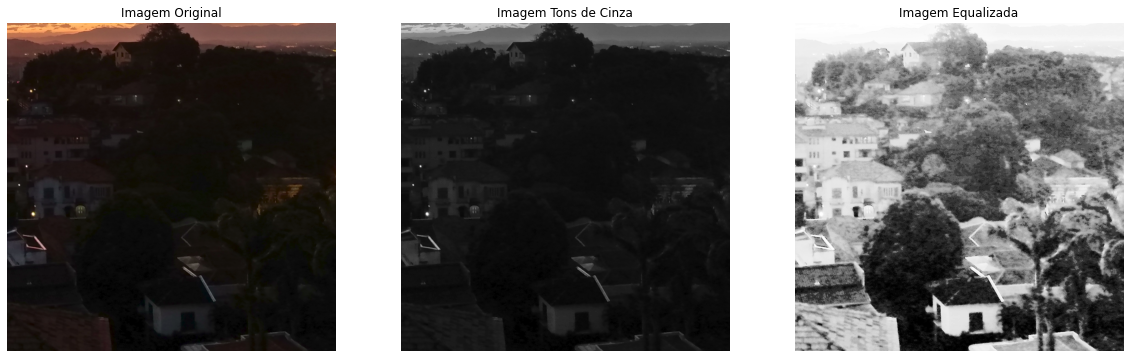

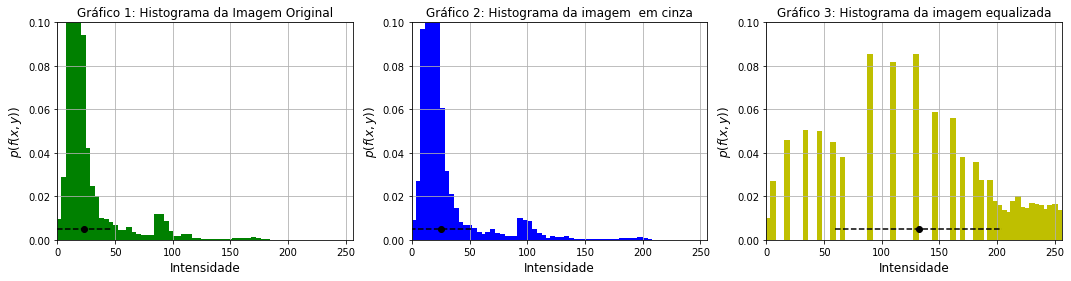

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
Original = cv2.imread('RecortePorDoSol.tiff')
grayImg = cv2.cvtColor(Original, cv2.COLOR_BGR2GRAY)
EqualizedImg = cv2.equalizeHist(grayImg)
cv2.imwrite("img_cinza.tiff", grayImg)
cv2.imwrite("img_equalizada.tiff", EqualizedImg)
plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.title('Imagem Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(Original, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.title('Imagem Tons de Cinza')
plt.axis('off')
plt.imshow(grayImg, cmap='gray')
plt.subplot(1,3,3)
plt.title('Imagem Equalizada')
plt.axis('off')
plt.imshow(EqualizedImg,cmap='gray')

#histogramas
plt.figure(figsize = (18,4))

#histogramas' da imagem original
img = cv2 . imread ('RecortePorDoSol.tiff',0)
rows , cols = img . shape
hist , bins = np . histogram ( img , range =(0 ,256) , bins =64)
hist = hist / float ( rows * cols )
center = ( bins [: -1] + bins [1:])/ 2
plt.subplot(1,3,1)
plt . bar ( center , hist , align =  'center', color = 'g' , width =5)
plt . xlim ([0 ,256])
plt . ylim ([0 ,0.1])
plt.grid(True)
plt . ylabel ( '$p ( f(x , y )) $', fontsize =12)
plt . xlabel ( 'Intensidade', fontsize =12)
m_y = 0.005
m = np . mean ( img )
s = np . std ( img )
plt . plot (m , m_y , 'ko' )
plt . plot ([ m - s , m + s ], [ m_y ] * 2, 'k--' )
plt.title('Gráfico 1: Histograma da Imagem Original')

#histogramas da imagem com correção de gama 0.5
img = cv2 . imread ('img_cinza.tiff',0)
rows , cols = img . shape
hist , bins = np . histogram ( img , range =(0 ,256) , bins =64)
hist = hist / float ( rows * cols )
center = ( bins [: -1] + bins [1:])/ 2
plt.subplot(1,3,2)
plt . bar ( center , hist , align =  'center', color = 'b' , width =5)
plt . xlim ([0 ,256])
plt . ylim ([0 ,0.1])
plt.grid(True)
plt . ylabel ( '$p ( f(x , y )) $', fontsize =12)
plt . xlabel ( 'Intensidade', fontsize =12)
m_y = 0.005
m = np . mean ( img )
s = np . std ( img )
plt . plot (m , m_y , 'ko' )
plt . plot ([ m - s , m + s ], [ m_y ] * 2, 'k--' )
plt.title('Gráfico 2: Histograma da imagem  em cinza')

#histogramas da imagem com correção de gama 2
img = cv2 . imread ('img_equalizada.tiff',0)
rows , cols = img . shape
hist , bins = np . histogram ( img , range =(0 ,256) , bins =64)
hist = hist / float ( rows * cols )
center = ( bins [: -1] + bins [1:])/ 2
plt.subplot(1,3,3)
plt . bar ( center , hist , align =  'center', color = 'y' , width =5)
plt . xlim ([0 ,256])
plt . ylim ([0 ,0.1])
plt.grid(True)
plt . ylabel ( '$p ( f(x , y )) $', fontsize =12)
plt . xlabel ( 'Intensidade', fontsize =12)
m_y = 0.005
m = np . mean ( img )
s = np . std ( img )
plt . plot (m , m_y , 'ko' )
plt . plot ([ m - s , m + s ], [ m_y ] * 2, 'k--' )
plt.title('Gráfico 3: Histograma da imagem equalizada')

plt.show()

# Discussão dos resultados da questão 2:

Para discutirmos este exercício temos que ter uma idéia clara do que é um histograma. Histograma é uma ferramenta que, na visão computacional, pode ser usado para representar de forma visual o nível de instensidade dos pixels num intervalo $ [ 0 , L - 1] $, da função

$$h(r_{ k })=n_{ k }$$

onde:

$k$-ésimo é o valor da intensidade;

$n_{ k }$ é o número de pixels da imagem;

$r_{ k }$ é a intensidade dos pixels.

Um histograma normalizado, por sua vez, divide o total de pixels pelas dimensões de uma imagem ($M$x$N$), representado pela função

$$p(r_{ k })= \frac{r_{ k }}{MN}$$

onde:

$p(r_{ k })$ é a probabilidade de ocorrer determinado nível $(r_{ k })$ na imagem.

Logo, temos que um histograma, representa em seu eixos, $h(r_{ k })=n_{ k }$ x $r_{ k }$ ou $p(r_{ k })= \frac{r_{ k }}{MN}$ x $r_{ k }$, variando se estamos lidando com um histograma normalizado ou não.

A transformação $T(r_{ k })$, apresentada na próxima equação, é chamada de **equalização de histograma** (ou *linearização de histograma*).

$$s_{k}=T(r_{ k }) = (L-1)\sum_{j=0}^{k}p_{r}(r_{j})=\frac{(L-1)}{MN}\sum_{j=0}^{k}n_j$$

Essa equação diz que, de forma simples, para cada pixel da imagem de entrada ocorre um mapeamento, gerando ao final do processo uma imagem de saída. Esta, por sua vez, apresenta uma realce em seu contraste, onde o histograma original é "espalhado" e cobrindo assim um maior intervalo na escala de intensidade do histograma resultante.

Ao avaliarmos os gráficos (1) e (2) percebemos que não há uma alteração grande no histograma quanto à intensidade do nível de cinza de seus pixels. Esse fato fica evidente ao analizarmos suas respectivas imagens, as figuras (1) e (2), pois não ocorre mudança de contraste ou intensidade nos pixels aparente. O que acontece é uma mudança de cor, de forma que saímos de uma imagem RGB (figura (1)) para uma imagem em tons de cinza (figura (2)), porém essa é a única mudança significativa nessa etapa.

Quando comparamos o gráfico (3) com os outros desse exercício, reparamos em uma mudança na configuração  desse histograma, apresentando o "espalhamento" da concetração de pixels nos níveis de intensidade (como comentado anteriormente) em pequenos intervalos, indicando um aumento no contraste da imagem. O que de fato ocorre, pois ao observarmos a figura (3) percebemos que enquanto algumas feições escuras ficaram mais escuras, de forma geral os objetos claros foram "clareados", o que significa que seus pixels passaram a ter valores mais altos e próximos do valor de branco, assim acentuando o contraste entre os elementos da imagem.  





